In [101]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob

In [108]:
runs = dict()
methods = ['joint-concat', 'l-densenet', 'pa-densenet', 'joint-dualnet','joint-hemis', 'joint-multitask']
for m in methods:
    print(m)
    runs[m] = []
    for i in range(5):
        f = glob.glob("/lustre04/scratch/cohenjos/PC-output/joe-s{}-{}/*val_auc.pkl".format(i, m))[0]
        print(f)
        runs[m].append(pickle.load(open(f, 'rb')))

    

joint-concat
/lustre04/scratch/cohenjos/PC-output/joe-s0-joint-concat/joint-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s1-joint-concat/joint-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s2-joint-concat/joint-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s3-joint-concat/joint-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s4-joint-concat/joint-val_auc.pkl
l-densenet
/lustre04/scratch/cohenjos/PC-output/joe-s0-l-densenet/l-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s1-l-densenet/l-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s2-l-densenet/l-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s3-l-densenet/l-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s4-l-densenet/l-val_auc.pkl
pa-densenet
/lustre04/scratch/cohenjos/PC-output/joe-s0-pa-densenet/pa-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s1-pa-densenet/pa-val_auc.pkl
/lustre04/scratch/cohenjos/PC-output/joe-s2-pa-densenet/pa-val_auc.pkl
/lustre04/scratch/cohenjos/PC-o

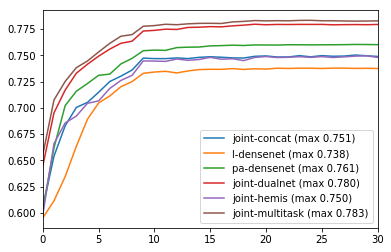

In [121]:
for m in methods:
    toplot = np.asarray(runs[m]).mean(0).mean(1)
    plt.plot(toplot, label="{} (max {:.3f})".format(m,toplot.max()));
plt.xlim(0,30)
plt.legend();